## Main Object of This Project

To carry out a preliminary analysis of the plans based on a relatively small client selection. 
We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. We are to analyze clients' behavior and determine which prepaid plan brings in more revenue.


## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    calls = pd.read_csv('C:/practicum/4. Statistical data analysis/4. Project/megaline_calls.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
# drop duplicates in calls
calls.drop_duplicates()
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
try:
    internet = pd.read_csv('C:/practicum/4. Statistical data analysis/4. Project/megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
# drop duplicates in internet
internet.drop_duplicates()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
try:
    messages = pd.read_csv('C:/practicum/4. Statistical data analysis/4. Project/megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
# drop duplicates in messages
messages.drop_duplicates()
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
try:
    plans = pd.read_csv('C:/practicum/4. Statistical data analysis/4. Project/megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [12]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# drop duplicates in plans
plans.drop_duplicates()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
try:
    users = pd.read_csv('C:/practicum/4. Statistical data analysis/4. Project/megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
# drop duplicates in users
users.drop_duplicates()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Conclusion:

1. For all the 4 datasets above, the data types seem okay except for the dates. They are supposed to be converted to *date times*.
2. There's no missing values except for **users**, in which most of the **churn_date** values are *missing*. But it is understandable that most of the users seem to remain here.
3. Duplicates are removed for all the datasets.
4. The **durations and internet data values** should be rounded in the calculations following.

## Step 2. Prepare the data

This step is to convert date values into required datatypes and the related month for further aggregations.
Then get the monthly average duration of calls, messages and internet uses.
Finally get the avergae revenues based on the customer behavior data.

In [17]:
# convert the dates in calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
# add a column for the month
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [18]:
# convert the dates in internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
# add a column for the month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [19]:
# convert the dates in messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
# add a column for the month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [20]:
# convert the dates in users
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Note**:

For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 

In [21]:
# convert the duration of calls according to the rule of Megaline
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [22]:
# before further calculations, it is necessary to get the average usages of calls, internet and messages per month
sum_calls = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
sum_calls = sum_calls.rename(columns = {'duration' : 'duration of calls'})
sum_calls.head()

duration of calls
user_id month                   
1000    12                 124.0
1001    8                  182.0
        9                  315.0
        10                 393.0
        11                 426.0

In [23]:
sum_calls = sum_calls.pivot_table(index = 'user_id', values = 'duration of calls', aggfunc = 'mean')
sum_calls['duration of calls'] = sum_calls['duration of calls'].apply(np.ceil)
sum_calls.head()

,duration of calls
user_id,
1000,124.0
1001,346.0
1002,277.0
1003,1104.0
1004,347.0


In [24]:
sum_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 1000 to 1499
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration of calls  481 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


**Note:**

For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [25]:
sum_internet = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
# mb_used will be rounded according to the rules of Megaline
sum_internet['gb_used'] = (sum_internet['mb_used'] / 1024).apply(np.ceil)
sum_internet.head()

mb_used  gb_used
user_id month                   
1000    12      1901.47      2.0
1001    8       6919.15      7.0
        9      13314.82     14.0
        10     22330.49     22.0
        11     18504.30     19.0

In [26]:
sum_internet = sum_internet.pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'mean')
sum_internet['gb_used'] = sum_internet['gb_used'].apply(np.ceil)
sum_internet.head()

,gb_used
user_id,
1000,2.0
1001,17.0
1002,14.0
1003,27.0
1004,20.0


In [27]:
sum_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 1000 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gb_used  489 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [28]:
sum_messages = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
sum_messages = sum_messages.rename(columns = {'id' : 'number of messages'})
sum_messages.head()

number of messages
user_id month                    
1000    12                     11
1001    8                      30
        9                      44
        10                     53
        11                     36

In [29]:
sum_messages = sum_messages.pivot_table(index = 'user_id', values = 'number of messages', aggfunc = 'mean')
# convert the number of messages into int64 type
sum_messages['number of messages'] = sum_messages['number of messages'].astype('int64')
sum_messages.head()

,number of messages
user_id,
1000,11
1001,41
1002,29
1003,50
1004,22


In [30]:
sum_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 1000 to 1497
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   number of messages  402 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


In [31]:
plans = users[['user_id', 'tariff','city']]
plans.head()

,user_id,tariff,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [32]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   tariff   500 non-null    object
 2   city     500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [33]:
# now merge those above tables together
# calls + internet
merge_1 = sum_internet.merge(sum_calls, on = 'user_id', how = 'outer')
merge_1.head()

,gb_used,duration of calls
user_id,,
1000,2.0,124.0
1001,17.0,346.0
1002,14.0,277.0
1003,27.0,1104.0
1004,20.0,347.0


In [34]:
# calls + internet + messages
merge_2 = merge_1.merge(sum_messages, on = 'user_id', how = 'outer')
merge_2.head()

,gb_used,duration of calls,number of messages
user_id,,,
1000,2.0,124.0,11.0
1001,17.0,346.0,41.0
1002,14.0,277.0,29.0
1003,27.0,1104.0,50.0
1004,20.0,347.0,22.0


In [35]:
# calls + internet + messages + plans
merge_data = merge_2.merge(plans, on = 'user_id', how = 'outer')
merge_data.head()

,user_id,gb_used,duration of calls,number of messages,tariff,city
0,1000,2.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,17.0,346.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,14.0,277.0,29.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,27.0,1104.0,50.0,surf,"Tulsa, OK MSA"
4,1004,20.0,347.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [36]:
merge_data.info()
# due to the different lengths of the former 4 tables, the final table has some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             500 non-null    int64  
 1   gb_used             489 non-null    float64
 2   duration of calls   481 non-null    float64
 3   number of messages  402 non-null    float64
 4   tariff              500 non-null    object 
 5   city                500 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 27.3+ KB


In [37]:
# now that the missing values are all quantitative values, it is feasible to fill them with a proper nummeric
merge_data.describe()

,user_id,gb_used,duration of calls,number of messages
count,500.000000,489.000000,481.000000,402.000000
mean,1249.500000,16.437628,417.020790,41.838308
std,144.481833,5.989121,192.974339,30.186225
min,1000.000000,1.000000,6.000000,1.000000
25%,1124.750000,13.000000,291.000000,19.250000
50%,1249.500000,16.000000,416.000000,33.500000
75%,1374.250000,19.000000,533.000000,59.000000
max,1499.000000,44.000000,1104.000000,159.000000


In [38]:
# it seems that for both internet and messages, the means are likely to be influenced by extreme big or small values, so it is 
# proper to fill in the missing values using median instead of means
merge_data = merge_data.fillna({'gb_used': 0,
                                'duration of calls' : 0, 
                                'number of messages' : 0})
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             500 non-null    int64  
 1   gb_used             500 non-null    float64
 2   duration of calls   500 non-null    float64
 3   number of messages  500 non-null    float64
 4   tariff              500 non-null    object 
 5   city                500 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 27.3+ KB


In [39]:
# calculating the monthly revenues 
# extra revenue from calls
extra_rev_calls = []
for i in range(len(merge_data)):
    if  merge_data.loc[i, 'tariff'] == 'surf':
        if merge_data.loc[i, 'duration of calls'] <= 500:
            rev = 0
            extra_rev_calls.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'duration of calls'] - 500) * 0.03
            extra_rev_calls.append(round(rev, 2))
    else:
        if merge_data.loc[i, 'duration of calls'] <= 3000:
            rev = 0
            extra_rev_calls.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'duration of calls'] - 3000) * 0.01
            extra_rev_calls.append(round(rev, 2))
extra_rev_calls = pd.Series(extra_rev_calls)
merge_data['extra_rev_calls'] = extra_rev_calls
merge_data.head()

,user_id,gb_used,duration of calls,number of messages,tariff,city,extra_rev_calls
0,1000,2.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00
1,1001,17.0,346.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00
2,1002,14.0,277.0,29.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.00
3,1003,27.0,1104.0,50.0,surf,"Tulsa, OK MSA",18.12
4,1004,20.0,347.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00


In [40]:
# extra revenue from internet
extra_rev_internet = []
for i in range(len(merge_data)):
    if  merge_data.loc[i, 'tariff'] == 'surf':
        if merge_data.loc[i, 'gb_used'] <= 15:
            rev = 0
            extra_rev_internet.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'gb_used'] - 15) * 10
            extra_rev_internet.append(round(rev, 2))
    else:
        if merge_data.loc[i, 'gb_used'] <= 30:
            rev = 0
            extra_rev_internet.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'gb_used'] - 30) * 7
            extra_rev_internet.append(round(rev, 2))
extra_rev_internet = pd.Series(extra_rev_internet)
merge_data['extra_rev_internet'] = extra_rev_internet 
merge_data.head()

,user_id,gb_used,duration of calls,number of messages,tariff,city,extra_rev_calls,extra_rev_internet
0,1000,2.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00,0
1,1001,17.0,346.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,20
2,1002,14.0,277.0,29.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.00,0
3,1003,27.0,1104.0,50.0,surf,"Tulsa, OK MSA",18.12,120
4,1004,20.0,347.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,50


In [41]:
# extra revenue from messages
extra_rev_messages = []
for i in range(len(merge_data)):
    if  merge_data.loc[i, 'tariff'] == 'surf':
        if merge_data.loc[i, 'number of messages'] <= 50:
            rev = 0
            extra_rev_messages.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'number of messages'] - 50) * 0.03
            extra_rev_messages.append(round(rev, 2))
    else:
        if merge_data.loc[i, 'number of messages'] <= 1000:
            rev = 0
            extra_rev_messages.append(round(rev, 2))
        else:
            rev = ceil(merge_data.loc[i, 'number of messages'] - 1000) * 0.01
            extra_rev_messages.append(round(rev, 2))
extra_rev_messages = pd.Series(extra_rev_messages)
merge_data['extra_rev_messages'] = extra_rev_messages 
merge_data.head()

,user_id,gb_used,duration of calls,number of messages,tariff,city,extra_rev_calls,extra_rev_internet,extra_rev_messages
0,1000,2.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00,0,0.0
1,1001,17.0,346.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,20,0.0
2,1002,14.0,277.0,29.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.00,0,0.0
3,1003,27.0,1104.0,50.0,surf,"Tulsa, OK MSA",18.12,120,0.0
4,1004,20.0,347.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,50,0.0


In [42]:
# basic revenues of the plans
basic_rev = []
for i in range(len(merge_data)):
    if merge_data.loc[i, 'tariff'] == 'surf':
        rev = 20.00
        basic_rev.append(round(rev, 2))
    else:
        rev = 70.00
        basic_rev.append(round(rev, 2))
basic_rev = pd.Series(basic_rev)    
merge_data['basic_rev'] = basic_rev 
merge_data.head()

,user_id,gb_used,duration of calls,number of messages,tariff,city,extra_rev_calls,extra_rev_internet,extra_rev_messages,basic_rev
0,1000,2.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00,0,0.0,70.0
1,1001,17.0,346.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,20,0.0,20.0
2,1002,14.0,277.0,29.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.00,0,0.0,20.0
3,1003,27.0,1104.0,50.0,surf,"Tulsa, OK MSA",18.12,120,0.0,20.0
4,1004,20.0,347.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,50,0.0,20.0


In [43]:
# build a new table of users, plans and fees
user_plan_fee = merge_data.loc[:, ['user_id', 'tariff', 'city','basic_rev', 'extra_rev_calls', 'extra_rev_internet', 
                                   'extra_rev_messages']]
user_plan_fee.head()

,user_id,tariff,city,basic_rev,extra_rev_calls,extra_rev_internet,extra_rev_messages
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0,0.00,0,0.0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,20,0.0
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.0,0.00,0,0.0
3,1003,surf,"Tulsa, OK MSA",20.0,18.12,120,0.0
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,50,0.0


In [44]:
# sum the revenues up
user_plan_fee['total revenue'] = (user_plan_fee.basic_rev + user_plan_fee.extra_rev_calls 
                                  + user_plan_fee.extra_rev_internet + user_plan_fee.extra_rev_messages)
user_plan_fee.head()

,user_id,tariff,city,basic_rev,extra_rev_calls,extra_rev_internet,extra_rev_messages,total revenue
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0,0.00,0,0.0,70.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,20,0.0,40.00
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.0,0.00,0,0.0,20.00
3,1003,surf,"Tulsa, OK MSA",20.0,18.12,120,0.0,158.12
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,50,0.0,70.00


In [45]:
user_plan_fee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             500 non-null    int64  
 1   tariff              500 non-null    object 
 2   city                500 non-null    object 
 3   basic_rev           500 non-null    float64
 4   extra_rev_calls     500 non-null    float64
 5   extra_rev_internet  500 non-null    int64  
 6   extra_rev_messages  500 non-null    float64
 7   total revenue       500 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.2+ KB


### Conclusion:

1. The **dates** are converted to **datetime** type in order to get the *month* values.
2. The uses of **calls, internet and messages** of each users are summed up and the *monthly average usages* are calculated.
3. The **monthly revenue** from each user are calculated based on the average monthly usages

## Step 3. Analyze the data
In this step, consumers' behavior data of the 2 plans is analyzed and compared.

In [46]:
# build a new talbe for consumers' behavior analysis
user_behavior = merge_data.loc[:, ['user_id', 'tariff', 'gb_used', 'duration of calls', 'number of messages']]
user_behavior.head()

,user_id,tariff,gb_used,duration of calls,number of messages
0,1000,ultimate,2.0,124.0,11.0
1,1001,surf,17.0,346.0,41.0
2,1002,surf,14.0,277.0,29.0
3,1003,surf,27.0,1104.0,50.0
4,1004,surf,20.0,347.0,22.0


In [47]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             500 non-null    int64  
 1   tariff              500 non-null    object 
 2   gb_used             500 non-null    float64
 3   duration of calls   500 non-null    float64
 4   number of messages  500 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 43.4+ KB


In [48]:
# dataset for plan surf
user_behavior_surf = user_behavior[user_behavior['tariff'] == 'surf']
user_behavior_surf.head()

,user_id,tariff,gb_used,duration of calls,number of messages
1,1001,surf,17.0,346.0,41.0
2,1002,surf,14.0,277.0,29.0
3,1003,surf,27.0,1104.0,50.0
4,1004,surf,20.0,347.0,22.0
5,1005,surf,17.0,496.0,11.0


In [49]:
user_behavior_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 1 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             339 non-null    int64  
 1   tariff              339 non-null    object 
 2   gb_used             339 non-null    float64
 3   duration of calls   339 non-null    float64
 4   number of messages  339 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.9+ KB


In [50]:
# dataset for plan ultimate
user_behavior_ultimate = user_behavior[user_behavior['tariff'] == 'ultimate']
user_behavior_ultimate.head()

,user_id,tariff,gb_used,duration of calls,number of messages
0,1000,ultimate,2.0,124.0,11.0
6,1006,ultimate,18.0,35.0,77.0
8,1008,ultimate,19.0,519.0,28.0
11,1011,ultimate,19.0,416.0,53.0
13,1013,ultimate,20.0,219.0,16.0


In [51]:
user_behavior_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 498
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             161 non-null    int64  
 1   tariff              161 non-null    object 
 2   gb_used             161 non-null    float64
 3   duration of calls   161 non-null    float64
 4   number of messages  161 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.5+ KB


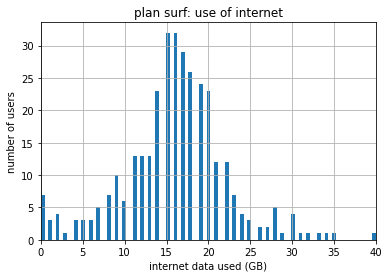

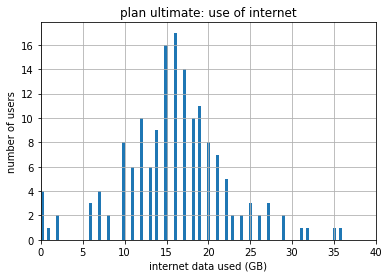

surf

internet data
average use of internet: 16.08
variance use of internet: 41.62
standard deviation use of internet: 6.45

ultimate

internet data
average use of internet: 16.07
variance use of internet: 39.65
standard deviation use of internet: 6.3


In [52]:
# analyzing the plans using histograms and statistics
# use of internet
# plan surf
user_behavior_surf['gb_used'].hist(bins = 100)
plt.title('plan surf: use of internet')
plt.xlabel('internet data used (GB)')
plt.ylabel('number of users')
plt.xlim([0, 40])
plt.show()
# plan ultimate
user_behavior_ultimate['gb_used'].hist(bins = 100)
plt.title('plan ultimate: use of internet')
plt.xlabel('internet data used (GB)')
plt.ylabel('number of users')
plt.xlim([0, 40])
plt.show()
print('surf')
print()
print('internet data')
print('average use of internet:', round(user_behavior_surf['gb_used'].mean(), 2))
print('variance use of internet:', round(user_behavior_surf['gb_used'].var(), 2))
print('standard deviation use of internet:', round(user_behavior_surf['gb_used'].std(), 2))
print()
print('ultimate')
print()
print('internet data')
print('average use of internet:', round(user_behavior_ultimate['gb_used'].mean(), 2))
print('variance use of internet:', round(user_behavior_ultimate['gb_used'].var(), 2))
print('standard deviation use of internet:', round(user_behavior_ultimate['gb_used'].std(), 2))

### Description:

1. The internet data used of  **ultimate** plan at *peak (the amount most likely to be used)* is *close* to that of **surf** plan.

2. The average internet data used of **ultimate** plan is *lower* than that of **surf** plan. 

3. The internet data used of **ultimate** plan values are more *concentrated (lower standard deviation)*.

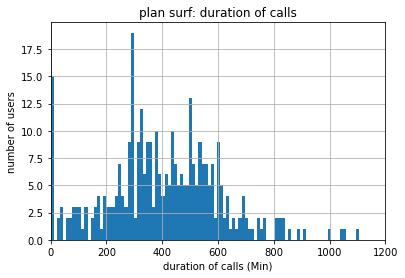

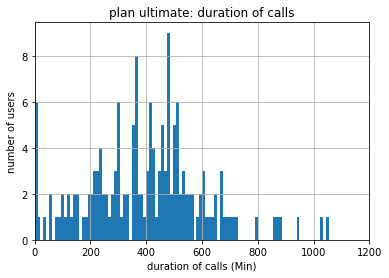

surf

duration of calls
average duration of calls: 401.96
variance duration of calls: 41968.03
standard deviation duration of calls: 204.86

ultimate

duration of calls
average duration of calls: 399.51
variance duration of calls: 42922.33
standard deviation duration of calls: 207.18


In [53]:
# duration of calls
# plan surf
user_behavior_surf['duration of calls'].hist(bins = 100)
plt.title('plan surf: duration of calls')
plt.xlabel('duration of calls (Min)')
plt.ylabel('number of users')
plt.xlim([0, 1200])
plt.show()
# plan ultimate
user_behavior_ultimate['duration of calls'].hist(bins = 100)
plt.title('plan ultimate: duration of calls')
plt.xlabel('duration of calls (Min)')
plt.ylabel('number of users')
plt.xlim([0, 1200])
plt.show()
print('surf')
print()
print('duration of calls')
print('average duration of calls:', round(user_behavior_surf['duration of calls'].mean(), 2))
print('variance duration of calls:', round(user_behavior_surf['duration of calls'].var(), 2))
print('standard deviation duration of calls:', round(user_behavior_surf['duration of calls'].std(), 2))
print()
print('ultimate')
print()
print('duration of calls')
print('average duration of calls:', round(user_behavior_ultimate['duration of calls'].mean(), 2))
print('variance duration of calls:', round(user_behavior_ultimate['duration of calls'].var(), 2))
print('standard deviation duration of calls:', round(user_behavior_ultimate['duration of calls'].std(), 2))

### Description:

1. The duration of calls of plan **ultimate** at the peak (the most likely duration of the users) is *higher* than that of plan **surf**.

2. The *average* duration of calls of plan **surf** is *slightly higher* than that of **ultimate**.

3. The duration of calls values of plan **ultimate** are *slightly less concentrated (slightly higher standard deviation)*.

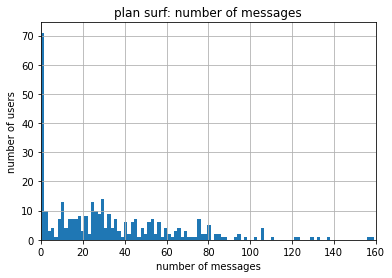

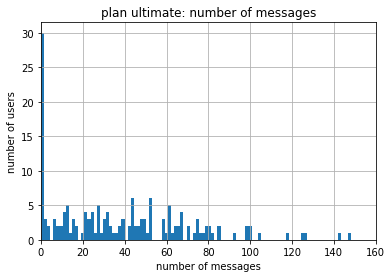

surf

number of messages
average number of messages: 31
variance number of messages: 963
standard deviation number of messages: 31
ultimate

number of messages
average number of messages: 37
variance number of messages: 1088
standard deviation number of messages: 32


In [54]:
# number of messages
# plan surf
user_behavior_surf['number of messages'].hist(bins = 100)
plt.title('plan surf: number of messages')
plt.xlabel('number of messages')
plt.ylabel('number of users')
plt.xlim([0, 160])
plt.show()
# plan ultimate
user_behavior_ultimate['number of messages'].hist(bins = 100)
plt.title('plan ultimate: number of messages')
plt.xlabel('number of messages')
plt.ylabel('number of users')
plt.xlim([0, 160])
plt.show()
print('surf')
print()
print('number of messages')
print('average number of messages:', int(user_behavior_surf['number of messages'].mean()))
print('variance number of messages:', int(user_behavior_surf['number of messages'].var()))
print('standard deviation number of messages:', int(user_behavior_surf['number of messages'].std()))
print('ultimate')
print()
print('number of messages')
print('average number of messages:', int(user_behavior_ultimate['number of messages'].mean()))
print('variance number of messages:', int(user_behavior_ultimate['number of messages'].var()))
print('standard deviation number of messages:', int(user_behavior_ultimate['number of messages'].std()))

### Description:

1. The number of messages of plan **ultimate** at the peak (the most likely number of messages of the users) is *higher* that of plan **surf** (except the 0 values).

2. The *average* number of messages of plan **ultimate** is *higher* than that of **surf**.

3. The number of messages values of plan **ultimate** are *slightly less concentrated (slightly higher standard deviation)*.

## Step 4. Test the hypotheses
To see if the revenues from the 2 plans differ and if the revenues from a specific region are different from those of other regions.

In [55]:
# get the revenue dataset for plan surf
surf_revenue = user_plan_fee.loc[user_plan_fee['tariff'] == 'surf', ['user_id', 'total revenue']]
surf_revenue.head()

,user_id,total revenue
1,1001,40.00
2,1002,20.00
3,1003,158.12
4,1004,70.00
5,1005,40.00


In [56]:
surf_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 1 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        339 non-null    int64  
 1   total revenue  339 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [57]:
# get the revenue dataset for plan ultimate 
ultimate_revenue = user_plan_fee.loc[user_plan_fee['tariff'] == 'ultimate', ['user_id', 'total revenue']]
ultimate_revenue.head()

,user_id,total revenue
0,1000,70.0
6,1006,70.0
8,1008,70.0
11,1011,70.0
13,1013,70.0


In [58]:
ultimate_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 498
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        161 non-null    int64  
 1   total revenue  161 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB


### Hypothesis 1:

H0 - The **average revenue** from users of Ultimate and Surf calling plans *doesn't differ*.

H1 - The **average revenue** from users of Ultimate and Surf calling plans *differs*.

In [59]:
# exclude the outliers
zscores_surf = st.zscore(surf_revenue['total revenue'])
abs_zscore_surf = np.abs(zscores_surf)
filtered_surf_revenue = surf_revenue[abs_zscore_surf < 3] ['total revenue']
filtered_surf_revenue.head()

1     40.00
2     20.00
3    158.12
4     70.00
5     40.00
Name: total revenue, dtype: float64

In [60]:
# exclude the outliers
zscores_ultimate = st.zscore(ultimate_revenue['total revenue'])
abs_zscore_ultimate = np.abs(zscores_ultimate)
filtered_ultimate_revenue = ultimate_revenue[abs_zscore_ultimate < 3] ['total revenue']
filtered_ultimate_revenue.head()

0     70.0
6     70.0
8     70.0
11    70.0
13    70.0
Name: total revenue, dtype: float64

In [61]:
## testing hypothesis 1
print('Null hypothesis: The average revenue from users of Ultimate and Surf calling plans doesn\'t differ.')
print()
alpha = 0.05
results = st.ttest_ind(filtered_surf_revenue, filtered_ultimate_revenue)
print('p-value:', round(results.pvalue, 4))
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis at the significance level of 5%")
else:
        print("We can't reject the null hypothesis at the significance level of 5%") 

Null hypothesis: The average revenue from users of Ultimate and Surf calling plans doesn't differ.

p-value: 0.0

We reject the null hypothesis at the significance level of 5%


In [62]:
print('average revenue of surf plan:', round(filtered_surf_revenue.mean(), 2))
print('average revenue of ultimate plan:', round(filtered_ultimate_revenue.mean(), 2))

average revenue of surf plan: 47.12
average revenue of ultimate plan: 70.04


### Result:
The **average revenue** from users of Ultimate and Surf calling plans *differs* at the significance level of 5%. 

From the means we see that **ultimate plan** generates *more revenue* per users.

In [63]:
user_plan_fee['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [64]:
# get the revenue dataset for users from NY-NJ area
# define a function to catergorize the users by regions
def region_category(word):
    if 'NY-NJ' in word:
        return 1
    else:
        return 0 
user_plan_fee['from NY-NJ'] = user_plan_fee['city'].apply(region_category)
user_plan_fee.head()

,user_id,tariff,city,basic_rev,extra_rev_calls,extra_rev_internet,extra_rev_messages,total revenue,from NY-NJ
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0,0.00,0,0.0,70.00,0
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,20,0.0,40.00,0
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.0,0.00,0,0.0,20.00,0
3,1003,surf,"Tulsa, OK MSA",20.0,18.12,120,0.0,158.12,0
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,0.00,50,0.0,70.00,0


In [65]:
# dataset for users from NY-NJ area
revenue_NY_NJ = user_plan_fee.loc[user_plan_fee['from NY-NJ'] == 1, ['user_id', 'total revenue']]
revenue_NY_NJ.head()

,user_id,total revenue
14,1014,24.17
22,1022,40.27
24,1024,21.92
26,1027,30.00
30,1031,70.00


In [66]:
revenue_NY_NJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 14 to 494
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        80 non-null     int64  
 1   total revenue  80 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [67]:
# dataset for users from other areas
revenue_other = user_plan_fee.loc[user_plan_fee['from NY-NJ'] == 0, ['user_id', 'total revenue']]
revenue_other.head()

,user_id,total revenue
0,1000,70.00
1,1001,40.00
2,1002,20.00
3,1003,158.12
4,1004,70.00


In [68]:
revenue_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        420 non-null    int64  
 1   total revenue  420 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.8 KB


### Hypothesis 2:

H0: The **average revenue** from users in **NY-NJ area** is *not different* from that of the users from other regions.

H1: The **average revenue** from users in **NY-NJ area** is *different* from that of the users from other regions.

In [69]:
# exclude the outliers
zscores_NY_NJ = st.zscore(revenue_NY_NJ['total revenue'])
abs_zscore_NY_NJ = np.abs(zscores_NY_NJ)
filtered_NY_NJ_revenue = revenue_NY_NJ[abs_zscore_NY_NJ < 3]['total revenue']
filtered_NY_NJ_revenue.head()

14    24.17
22    40.27
24    21.92
26    30.00
30    70.00
Name: total revenue, dtype: float64

In [70]:
# exclude the outliers
zscores_other = st.zscore(revenue_other['total revenue'])
abs_zscore_other = np.abs(zscores_other)
filtered_other_revenue = revenue_other[abs_zscore_other < 3]['total revenue']
filtered_other_revenue.head()

0     70.00
1     40.00
2     20.00
3    158.12
4     70.00
Name: total revenue, dtype: float64

In [71]:
# testing hypothesis 2
print('Null hypothesis: The average revenue from users in NY-NJ area is not different from that of the users from other regions.')
print()
alpha = 0.05
results = st.ttest_ind(filtered_NY_NJ_revenue, filtered_other_revenue)
print('p-value:', round(results.pvalue, 4))
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis at the significance level of 5%")
else:
        print("We can't reject the null hypothesis at the significance level of 5%") 

Null hypothesis: The average revenue from users in NY-NJ area is not different from that of the users from other regions.

p-value: 0.3658

We can't reject the null hypothesis at the significance level of 5%


In [72]:
print('average revenue of users from NY-NJ area:', round(filtered_NY_NJ_revenue.mean(), 2))
print('average revenue of users from other areas:', round(filtered_other_revenue.mean(), 2))

average revenue of users from NY-NJ area: 50.87
average revenue of users from other areas: 54.06


### Result:

We can't reject that the **average revenue** from users in **NY-NJ area** is *not different* from that of the users from other regions at the significance level of 5%.

## Step 5. Write an overall conclusion

After studying these datasets, we can draw following conclusions:

1. From the users' behaviors, it seems that the users of the both plans *don't differ much* in terms of **phone calls** and **internet data**. But users in **ultimate** plan are only *more likely* to send **messages**.

2. The **ultimate** plan generates *much more* **average revenue** per user (significance level = 5%).

3. The **average revenue** from users in **NY-NJ area** is *not different* from that of the users from other regions (significance level = 5%).

From those findings, here are some suggestions for Megaline:

1. Megaline can lower the upper-limit of phone call duration and internet data include in the surf plan, so that users will more likely to choose the ultimate plan (cause the users of the 2 plans don't actually differ much in the needs of these 2 services as people normally think), which is more profitable for the company.

2. It is worth investing more into the propaganda of the ultimate plan because it really generates more revenue.